# Text Classification on TTC 4900

## Analyze and Preprocess Dataset

In [6]:
from datasets import load_dataset
import pandas as pd

ttc4900 = load_dataset("ttc4900")

# There is only 'train' set in the data
ttc4900 = pd.DataFrame(ttc4900['train'])

ttc4900 = ttc4900.rename(columns={'category': 'label'})

# Change order of columns
ttc4900 = ttc4900[['text', 'label']]

display(ttc4900)

,text,label
0,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,0
1,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,0
2,disko lar kaldırılıyor başbakan_yardımcısı ar...,0
3,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,0
4,erdoğan idamın bir haklılık sebebi var demek ...,0
...,...,...
4895,iphone lara geri dönüyor ios 6 sürümüyle tele...,6
4896,muslukta devrim sadece elimizi yıkadığımız mu...,6
4897,halka iyi anlatılmalı bilgi_teknolojileri ile...,6
4898,çöpe gidiyorlar apple 775 bin uygulamayla app...,6


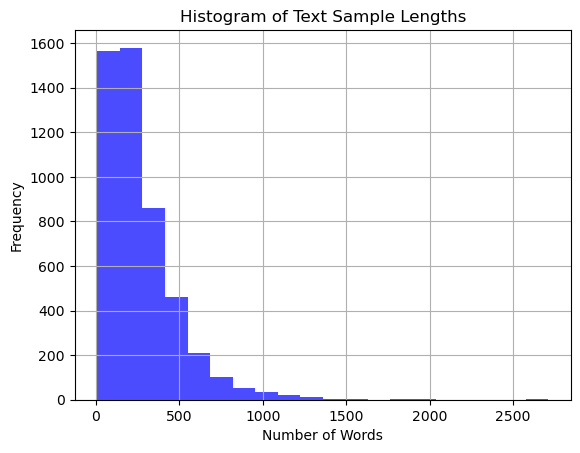

44933.69597539671
268.6981632653061


In [9]:
import matplotlib.pyplot as plt

df = ttc4900

df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.hist(df['word_count'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Text Sample Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print variance and average
variance = df['word_count'].var()
average = df['word_count'].mean()

print(variance, average, sep='\n')


Analysis of TTC 4900 Dataset



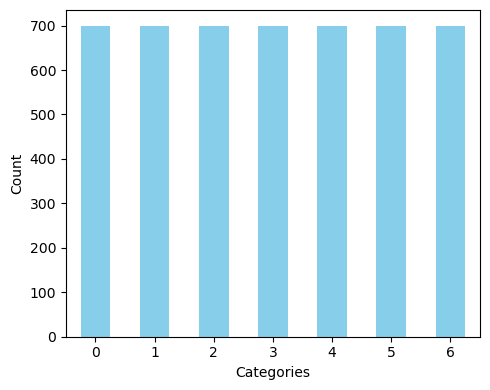


Statistical measures for input text (character-level):



,text
count,4900.00
mean,1973.29
std,1551.70
min,72.00
25%,911.75
50%,1516.00
75%,2601.00
max,19383.00


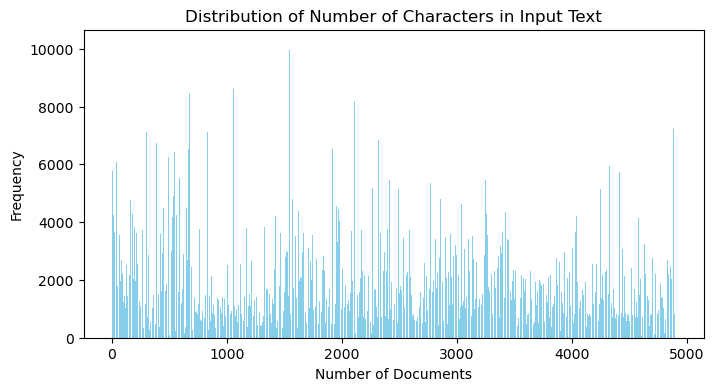

Statistical measures for input text (word-level):



,text
count,4900.00
mean,268.70
std,211.98
min,8.00
25%,124.00
50%,206.50
75%,352.00
max,2711.00


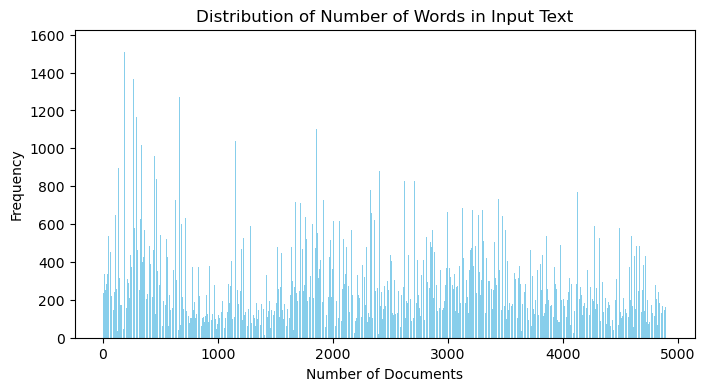

In [2]:
import sys
sys.path.append("../Helper_Functions/")

from general_utils import analyze_dataset 

analyze_dataset(ttc4900, 
                (5, 4), (8, 4), (8, 4), 
                0.55, 0.09,
                0.6, 0.09,
                'skyblue', 'TTC 4900')

In [37]:
# ttc4900.to_csv("../Data/TTC_4900/ttc4900.csv", index=False)

## Fine Tune

In [1]:
import torch
import pandas as pd

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### Preprocess Dataset

In [1]:
# ttc4900 = pd.read_csv("../Data/TTC_4900/ttc4900.csv")
# display(ttc4900)

,text,label
0,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,0
1,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,0
2,disko lar kaldırılıyor başbakan_yardımcısı ar...,0
3,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,0
4,erdoğan idamın bir haklılık sebebi var demek ...,0
...,...,...
4895,iphone lara geri dönüyor ios 6 sürümüyle tele...,6
4896,muslukta devrim sadece elimizi yıkadığımız mu...,6
4897,halka iyi anlatılmalı bilgi_teknolojileri ile...,6
4898,çöpe gidiyorlar apple 775 bin uygulamayla app...,6


In [2]:
# # Shuffle dataset
# ttc4900 = ttc4900.sample(frac=1, random_state=42).reset_index(drop=True)
# display(ttc4900)

,text,label
0,acıların kedisi sam çatık kaşlı kedi sam in i...,6
1,g saray a git santos van_persie den forma ala...,5
2,endonezya da çatışmalar 14 ölü endonezya da i...,1
3,emniyetten polis logolu virüs uyarısı telefon...,6
4,beni türk yapın cristian_baroni yıldırım dan ...,5
...,...,...
4895,kuantum bilgisayarlar için dev adım amerikalı...,6
4896,koç tan kürt sorunu ile ilgili önemli açıklam...,0
4897,her yıl 125 bin bebek prematüre doğuyor türki...,4
4898,g saray da borç alacak farkı büyük ! galatasa...,5


In [2]:
text_labels = ["siyaset", "dunya", "ekonomi", "kultur", "saglik", "spor", "teknoloji"]
num_labels = len(text_labels)

id2label = {index:label for index, label in enumerate(text_labels)}
label2id = {label:index for index, label in enumerate(text_labels)}

print(id2label, label2id, sep="\n")

{0: 'siyaset', 1: 'dunya', 2: 'ekonomi', 3: 'kultur', 4: 'saglik', 5: 'spor', 6: 'teknoloji'}
{'siyaset': 0, 'dunya': 1, 'ekonomi': 2, 'kultur': 3, 'saglik': 4, 'spor': 5, 'teknoloji': 6}


In [9]:
# from sklearn.model_selection import train_test_split

# # Train %70, Val %15 and Test %15

# train_set, test_set = train_test_split(ttc4900, test_size=0.3, random_state=42)
# val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

# X_train = train_set['text'].tolist()
# y_train = train_set['label'].tolist()

# X_val = val_set['text'].tolist()
# y_val = val_set['label'].tolist()

# X_test = test_set['text'].tolist()
# y_test = test_set['label'].tolist()

# print("Train set shape      :", len(X_train), len(y_train))
# print("Validation set shape :", len(X_val), len(y_val))
# print("Test set shape       :", len(X_test), len(y_test))

# train_set.to_csv("../Data/TTC_4900/ttc4900_train.csv", index=False)
# val_set.to_csv("../Data/TTC_4900/ttc4900_val.csv", index=False)
# test_set.to_csv("../Data/TTC_4900/ttc4900_test.csv", index=False)

Train set shape      : 3430 3430
Validation set shape : 735 735
Test set shape       : 735 735


In [3]:
train_set = pd.read_csv("../Data/TTC_4900/ttc4900_train.csv")
val_set = pd.read_csv("../Data/TTC_4900/ttc4900_val.csv")
test_set = pd.read_csv("../Data/TTC_4900/ttc4900_test.csv")

X_train = train_set['text'].tolist()
y_train = train_set['label'].tolist()

X_val = val_set['text'].tolist()
y_val = val_set['label'].tolist()

X_test = test_set['text'].tolist()
y_test = test_set['label'].tolist()

print("Train set shape      :", len(X_train), len(y_train))
print("Validation set shape :", len(X_val), len(y_val))
print("Test set shape       :", len(X_test), len(y_test))

Train set shape      : 3430 3430
Validation set shape : 735 735
Test set shape       : 735 735


### Prepare Training

In [4]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def compute_metrics(preds): 
    
    labels = preds.label_ids 
    preds = preds.predictions.argmax(-1) 
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro') 
    acc = accuracy_score(labels, preds) 
    
    return { 
        'Accuracy': acc, 
        'F1': f1, 
        'Precision': precision, 
        'Recall': recall 
    }


def predict(model, tokenizer, text):
    
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    
    return probs, probs.argmax(), model.config.id2label[probs.argmax().item()]

### BERTurk

In [7]:
from transformers import BertTokenizerFast, BertForSequenceClassification

tokenizer_bert = BertTokenizerFast.from_pretrained("dbmdz/bert-base-turkish-uncased", max_length=512)
model_bert = BertForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-uncased", num_labels=num_labels, id2label=id2label, label2id=label2id).to(device)

In [10]:
train_encodings = tokenizer_bert(X_train, truncation=True, padding=True)
val_encodings  = tokenizer_bert(X_val, truncation=True, padding=True)
test_encodings = tokenizer_bert(X_test, truncation=True, padding=True)

from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train)
val_dataset = MyDataset(val_encodings, y_val)
test_dataset = MyDataset(test_encodings, y_test)

#### Train

In [13]:
training_args = TrainingArguments(
    output_dir='../Output/', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='../Output/BERT_Logs',            
    logging_steps=100,
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    fp16=True,
    load_best_model_at_end=True
)

trainer_bert = Trainer(
    model=model_bert,                    
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

In [14]:
trainer_bert.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,1.204300,0.330434,0.900680,0.899222,0.901304,0.901972
200,0.313300,0.296075,0.900680,0.901404,0.904264,0.904031
300,0.228300,0.278821,0.922449,0.922938,0.926372,0.922087
400,0.185200,0.265127,0.925170,0.925031,0.925550,0.925067
500,0.098900,0.271845,0.934694,0.934974,0.935078,0.935348
600,0.070400,0.267841,0.937415,0.937470,0.938415,0.937032


TrainOutput(global_step=645, training_loss=0.33210041060928225, metrics={'train_runtime': 5188.2355, 'train_samples_per_second': 1.983, 'train_steps_per_second': 0.124, 'total_flos': 2707534303488000.0, 'train_loss': 0.33210041060928225, 'epoch': 3.0})

#### Evaluate

In [16]:
result = [trainer_bert.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(result, index=["train", "val", "test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.087322,0.975802,0.975858,0.976022,0.975981
val,0.265127,0.925170,0.925031,0.925550,0.925067
test,0.379104,0.908844,0.907195,0.909181,0.906491


In [19]:
text = "Fenerbahçeli futbolcular kısa paslarla hazırlık çalışması yaptılar"
predict(model_bert, tokenizer_bert, text)[0]

tensor([[0.0054, 0.0163, 0.0071, 0.0079, 0.0125, 0.9455, 0.0053]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)

#### Save Model

In [20]:
model_path = "berturk_text_classification_fine_tuned"

trainer_bert.save_model(model_path)
tokenizer_bert.save_pretrained(model_path)

('bert_text_classification_fine_tuned\\tokenizer_config.json',
 'bert_text_classification_fine_tuned\\special_tokens_map.json',
 'bert_text_classification_fine_tuned\\vocab.txt',
 'bert_text_classification_fine_tuned\\added_tokens.json',
 'bert_text_classification_fine_tuned\\tokenizer.json')

### TurkishBERTweet

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_tbt = AutoTokenizer.from_pretrained("VRLLab/TurkishBERTweet", max_length=128)
model_tbt = AutoModelForSequenceClassification.from_pretrained("VRLLab/TurkishBERTweet", num_labels=num_labels, id2label=id2label, label2id=label2id)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at VRLLab/TurkishBERTweet and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
train_encodings = tokenizer_tbt(X_train, truncation=True, padding=True, max_length=128)
val_encodings  = tokenizer_tbt(X_val, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer_tbt(X_test, truncation=True, padding=True, max_length=128)

from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train)
val_dataset = MyDataset(val_encodings, y_val)
test_dataset = MyDataset(test_encodings, y_test)

#### Train

In [7]:
training_args = TrainingArguments(
    output_dir='../Output/', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='../Output/TBT_Logs',            
    logging_steps=100,
    evaluation_strategy="epoch",
    eval_steps=1,
    save_strategy="epoch",
    save_steps=1,
    fp16=True,
    load_best_model_at_end=True
)

trainer_tbt = Trainer(
    model=model_tbt,                    
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

In [8]:
trainer_tbt.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.486000,0.570901,0.862585,0.862127,0.871137,0.864032
2,0.275700,0.563889,0.885714,0.883144,0.885233,0.884516
3,0.076100,0.548779,0.910204,0.909421,0.909185,0.910594


TrainOutput(global_step=645, training_loss=0.38129790476126263, metrics={'train_runtime': 165.7372, 'train_samples_per_second': 62.086, 'train_steps_per_second': 3.892, 'total_flos': 676883575872000.0, 'train_loss': 0.38129790476126263, 'epoch': 3.0})

#### Evaluate

In [9]:
result = [trainer_tbt.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(result, index=["train", "val", "test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.039082,0.992711,0.992766,0.992853,0.992698
val,0.548779,0.910204,0.909421,0.909185,0.910594
test,0.646831,0.891156,0.889033,0.890410,0.889613


In [11]:
text = "Fenerbahçeli futbolcular kısa paslarla hazırlık çalışması yaptılar"
predict(model_tbt, tokenizer_tbt, text)[0]

tensor([[1.6921e-04, 1.4701e-04, 2.4120e-04, 4.4343e-04, 1.4502e-04, 9.9826e-01,
         5.9422e-04]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

#### Save Model

In [12]:
model_path = "turkishbertweet_text_classification_fine_tuned_ttc4900"

trainer_tbt.save_model(model_path)
tokenizer_tbt.save_pretrained(model_path)

('turkishbertweet_text_classification_fine_tuned\\tokenizer_config.json',
 'turkishbertweet_text_classification_fine_tuned\\special_tokens_map.json',
 'turkishbertweet_text_classification_fine_tuned\\vocab.json',
 'turkishbertweet_text_classification_fine_tuned\\merges.txt',
 'turkishbertweet_text_classification_fine_tuned\\added_tokens.json',
 'turkishbertweet_text_classification_fine_tuned\\tokenizer.json')

### TURNA

In [12]:
import sys
sys.path.append('../../turkish_lm_tuner/')

from t5_classifier import T5ForClassification

from transformers import AutoTokenizer, BitsAndBytesConfig

double_quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
tokenizer_turna = AutoTokenizer.from_pretrained("boun-tabi-LMG/TURNA", max_length=128)

model_turna = T5ForClassification.from_pretrained("boun-tabi-LMG/TURNA",
                                                    quantization_config=double_quant_config,
                                                    num_labels=num_labels, 
                                                    id2label=id2label, label2id=label2id)

In [18]:
from transformers import AutoTokenizer
from trainer import TrainerForClassification

# Set your parameters
model_name = "boun-tabi-LMG/TURNA"

# Load tokenizer and model
tokenizer_turna = AutoTokenizer.from_pretrained(model_name)
model_turna = T5ForClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

ModuleNotFoundError: No module named 'evaluate'

In [ ]:
# Create Trainer
trainer_turna = TrainerForClassification(
    model_name=model_name,
    task="classification",  # Set the task type ("classification", "ner", "pos_tagging")
    training_params={"output_dir": "./output_directory", "num_train_epochs": 3},  # Set your training parameters
    optimizer_params=None,  # You can set optimizer parameters if needed
    model_save_path="./model_save_path",
    num_labels=num_labels,
    postprocess_fn=None  # Set your post-processing function if needed
)

In [7]:
train_encodings = tokenizer_turna(X_train, truncation=True, padding='max_length')
val_encodings  = tokenizer_turna(X_val, truncation=True, padding='max_length')
test_encodings = tokenizer_turna(X_test, truncation=True, padding='max_length')

from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train)
val_dataset = MyDataset(val_encodings, y_val)
test_dataset = MyDataset(test_encodings, y_test)

#### Train

In [8]:
training_args = TrainingArguments(
    output_dir='../Output/', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,              
    per_device_train_batch_size=2,  
    per_device_eval_batch_size=4,
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='../Output/TURNA_Logs',            
    logging_steps=100,
    evaluation_strategy="epoch",
    eval_steps=1,
    save_strategy="epoch",
    save_steps=1,
    fp16=True,
    load_best_model_at_end=True
)

trainer_turna = Trainer(
    model=model_turna,                    
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

In [ ]:
trainer_turna.train()

### Kanarya

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig
from peft import LoraConfig, PeftConfig, get_peft_model, prepare_model_for_kbit_training, TaskType

double_quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    load_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

tokenizer_kanarya = AutoTokenizer.from_pretrained("asafaya/kanarya-750m", max_length=128)
tokenizer_kanarya.pad_token = tokenizer_kanarya.eos_token

model_kanarya = AutoModelForSequenceClassification.from_pretrained("asafaya/kanarya-750m",
                                                                   device_map="auto",
                                                                   quantization_config=double_quant_config,
                                                                   num_labels=num_labels, 
                                                                   id2label=id2label, label2id=label2id)

model_kanarya = prepare_model_for_kbit_training(model_kanarya)

lora_config = LoraConfig(
    r=8, 
lora_alpha=8, 
    lora_dropout=0.1, 
    task_type=TaskType.SEQ_CLS
)

model_kanarya = get_peft_model(model_kanarya, lora_config)

model_kanarya.config.pad_token_id = model_kanarya.config.eos_token_id
model_kanarya.config.use_cache = False

bin C:\Users\onurp\anaconda3\envs\master\lib\site-packages\bitsandbytes\libbitsandbytes_cuda121.dll


Some weights of GPTJForSequenceClassification were not initialized from the model checkpoint at asafaya/kanarya-750m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
train_encodings = tokenizer_kanarya(X_train, truncation=True, padding=True)
val_encodings  = tokenizer_kanarya(X_val, truncation=True, padding=True)
test_encodings = tokenizer_kanarya(X_test, truncation=True, padding=True)

from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train)
val_dataset = MyDataset(val_encodings, y_val)
test_dataset = MyDataset(test_encodings, y_test)

#### Train

In [7]:
training_args = TrainingArguments(
    output_dir='../Output/', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,  
    per_device_eval_batch_size=4,
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='../Output/Kanarya_Logs', 
    logging_steps=100,
    evaluation_strategy="epoch",
    eval_steps=1,
    save_strategy="epoch",
    save_steps=1,
    fp16=False,
    load_best_model_at_end=True
)

trainer_kanarya = Trainer(
    model=model_kanarya,                    
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

In [8]:
trainer_kanarya.train()

C:\Users\onurp\anaconda3\envs\master\lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

#### Evaluate

In [9]:
result = [trainer_kanarya.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(result, index=["train", "val", "test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.039082,0.992711,0.992766,0.992853,0.992698
val,0.548779,0.910204,0.909421,0.909185,0.910594
test,0.646831,0.891156,0.889033,0.890410,0.889613


#### Save Model

In [12]:
model_path = "kanarya_text_classification_fine_tuned_ttc4900"

trainer_tbt.save_model(model_path)
tokenizer_tbt.save_pretrained(model_path)

('turkishbertweet_text_classification_fine_tuned\\tokenizer_config.json',
 'turkishbertweet_text_classification_fine_tuned\\special_tokens_map.json',
 'turkishbertweet_text_classification_fine_tuned\\vocab.json',
 'turkishbertweet_text_classification_fine_tuned\\merges.txt',
 'turkishbertweet_text_classification_fine_tuned\\added_tokens.json',
 'turkishbertweet_text_classification_fine_tuned\\tokenizer.json')